#  Definição do Projeto

#### Modelo capaz de prever se uma pessoa pode ou não desenvolver diabetes
#### Dataset: Pima Indians Diabetes Data Set http://archive.ics.uci.edu/ml/datasets/diabetes

### Informações sobre os atributos:

1. Número de gravidez
2. Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra cutânea do tríceps (mm)
5. Insulina sérica de 2 horas (mu U/ml)
6. Índice de massa corporal (peso em kg/(altura em m)^2)
7. Função hereditária do diabetes
8. Idade (anos)
9. Variável de classe (0 ou 1)

In [18]:
# Importando os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Carregando o dataset e renomeando as colunas
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names = colunas)

In [9]:
# Visualizando o shape do dataset
dados.shape

(768, 9)

In [8]:
# Visualizando os dados
dados.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
# Tipos de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [13]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

In [14]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
# Verificando o skew de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

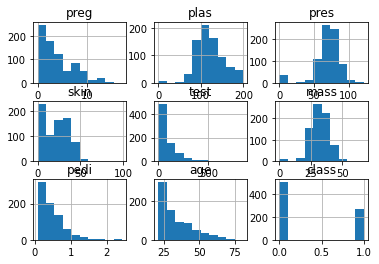

In [19]:
# Histograma para verificar a simetria dos dados
dados.hist()
plt.show()

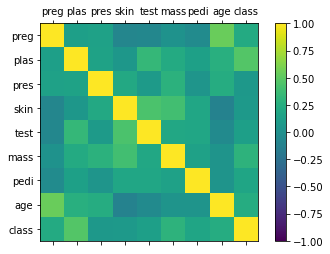

In [28]:
# Matriz de correlação com as variaveis
correlacao = dados.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()